<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Rule Learning</strong></h1>

### <b>Author: Nguyen Dang Huynh Chau</b>

# ✴️ Importing Necessary Libraries and datasets
****

In [1]:
import sys
!{sys.executable} -m pip -q install pygame
!{sys.executable} -m pip -q install pyglet==1.5.11
!{sys.executable} -m pip -q install gym


import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import numpy as np
import gym

In [2]:
env = gym.make('MountainCar-v0')
state = env.reset()
print(state)


[-0.50413513  0.        ]


In [3]:
print('State space: ', env.observation_space)
print('Action space: ', env.action_space)

State space:  Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space:  Discrete(3)


In [4]:
print('State space Low: ', env.observation_space.low)
print('State space High: ', env.observation_space.high)

State space Low:  [-1.2  -0.07]
State space High:  [0.6  0.07]


In [5]:
num_states = (env.observation_space.high - env.observation_space.low)*np.array([10, 100])
num_states = np.round(num_states, 0).astype(int) + 1
print(num_states)

[19 15]


In [6]:
# Discretize state
def discretize_state(state, env_low):
   state_adj = (state - env_low)*np.array([10, 100])
   state_adj = np.round(state_adj, 0).astype(int)
   return state_adj

In [7]:
def show_state(env, step=0, info=""):
   plt.figure(1)
   plt.clf()
   plt.imshow(env.render(mode='rgb_array'))
   plt.title("Step: %d %s" % (step, info))
   plt.axis('off')
   display.clear_output(wait=True)
   display.display(plt.gcf())

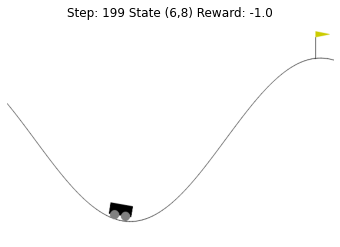

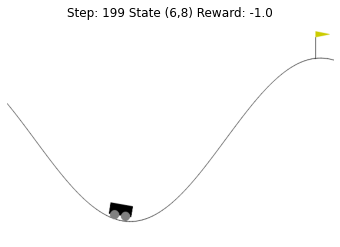

In [8]:
env.reset()
done = False
step_index = 0
while done != True:
   action = env.action_space.sample() # get a random action from the set of actions
   state, reward, done, info = env.step(action) # perform the action and receive new state and reward
   d_state = discretize_state(state, env.observation_space.low)
   show_state(env, step=step_index, info='State ({},{}) Reward: {}'.format(d_state[0], d_state[1], reward))
   step_index = step_index + 1

In [11]:
# Define Q-learning function
def QLearning(env, Q, learning, discount, epsilon, episodes):
    # Env: The OpenAI gym environment
    # Q: Initial Q table
    # learning: Learning Rate of Q learing
    # discount: discount facotr (gamma)
    # epsilon: epsilon for exploration vs exploitation
    # episodes: number of episodes to run when learing the Q table
    
    # Initialize variables to hold rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate reduction in epsilon per episode
    epsilon_d = (epsilon)/episodes
    
    for i in range(episodes):
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        state_adj = discretize_state(state, env.observation_space.low)
    
        while done != True:   
                
            # Determine next action - epsilon greedy strategy for explore vs exploitation
            if np.random.random() < 1 - epsilon:
                # select the best action according to Qtable (exploitation)
                # TODO
                action = np.argmax(Q[state]) # Exploit learned values
            else:
                # select a random action (exploration)
                # TODO
                action = env.action_space.sample()
            
            # Step and Get the next state and reward
            # TODO
            next_state, reward, done, info = env.step(action) 
            
            old_value = Q[state, action]
            next_max = np.max(Q[next_state])
            
            # Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Update the Q table
            else:
                # TODO
                new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
                Q[state, action] = new_value
                                      
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Update epsilon
        if epsilon > 0:
            epsilon -= epsilon_d
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        # Average reward is the average number of steps that the agent spent to win
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {} Epsilon {}'.format(i+1, ave_reward, np.round(epsilon,2)))
            
    env.close()
    
    return Q, ave_reward_list


In [12]:
# Initialize Q table randomly
Q = np.random.uniform(low = -1, high = 1, size = (num_states[0], num_states[1], env.action_space.n))
# Run Q-learning algorithm
Q, rewards = QLearning(env, Q, 0.2, 0.9, 0.8, 5000)

IndexError: arrays used as indices must be of integer (or boolean) type